In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# Loading DataSet 

DF = pd.read_csv('D:\\DataSets\\train.csv')
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Understanding Data 

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
DF.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Checking For Missing Values And Handling It


In [5]:
DF.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

So I will Drop All Columns that have a huge number of missing Values ,
and then Filling the others those have a little number of missing values 

In [6]:
# dropping Columns (Alley , FireplaceQu ,PoolQC,Fence,MiscFeature)

DF.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns', inplace=True)




In [7]:
# Replace Categorical Values in Columns With Mode

# First Column 'BsmtQual' 

DF["BsmtQual"].mode()[0]
BsmtQual_mode=DF["BsmtQual"].mode()[0]
DF["BsmtQual"].fillna(BsmtQual_mode,inplace=True)

#Second Column 'BsmtCond' 

DF["BsmtCond"].mode()[0]
BsmtCond_mode=DF["BsmtCond"].mode()[0]
DF["BsmtCond"].fillna(BsmtCond_mode,inplace=True)

#Third Column 'BsmtExposure' 

DF["BsmtExposure"].mode()[0]
BsmtExposure_mode=DF["BsmtExposure"].mode()[0]
DF["BsmtExposure"].fillna(BsmtExposure_mode,inplace=True)

# Fourth Column 'BsmtFinType1' 

DF["BsmtFinType1"].mode()[0]
BsmtFinType1_mode=DF["BsmtFinType1"].mode()[0]
DF["BsmtFinType1"].fillna(BsmtFinType1_mode,inplace=True)

# Fifth Column 'BsmtFinType2'

DF["BsmtFinType2"].mode()[0]
BsmtFinType2_mode=DF["BsmtFinType2"].mode()[0]
DF["BsmtFinType2"].fillna(BsmtFinType2_mode,inplace=True)

#Sixth Column 'Electrical'

DF["Electrical"].mode()[0]
Electrical_mode=DF["Electrical"].mode()[0]
DF["Electrical"].fillna(Electrical_mode,inplace=True)

# Seventh Column 'GarageType'

DF["GarageType"].mode()[0]
GarageType_mode=DF["GarageType"].mode()[0]
DF["GarageType"].fillna(GarageType_mode,inplace=True)

# Eigth Cloumn 'GarageFinish'

DF["GarageFinish"].mode()[0]
GarageFinish_mode=DF["GarageFinish"].mode()[0]
DF["GarageFinish"].fillna(GarageFinish_mode,inplace=True)

# Ninth Column 'GarageQual'

DF["GarageQual"].mode()[0]
GarageQual_mode=DF["GarageQual"].mode()[0]
DF["GarageQual"].fillna(GarageQual_mode,inplace=True)

#Tenth Column 'GarageCond'

DF["GarageCond"].mode()[0]
GarageCond_mode=DF["GarageCond"].mode()[0]
DF["GarageCond"].fillna(GarageCond_mode,inplace=True)

# Eleventh Cloumn 'MasVnrType'

DF ['MasVnrType'].mode()[0]
MasVnrType_mode=DF ['MasVnrType'].mode()[0]
DF["MasVnrType"].fillna(MasVnrType_mode,inplace=True)


In [8]:
# Replace missing values in Collumns with numeric values by Mean (Average)

#First Cloumn 'LotFrontage'

LotFrontage_mean=DF["LotFrontage"].mean()
DF['LotFrontage'].fillna(LotFrontage_mean,inplace=True)

#Second Column 'GarageYrBlt'

GarageYrBlt_mean = DF['GarageYrBlt'].mean()
DF['GarageYrBlt'].fillna(GarageYrBlt_mean,inplace=True)

# Third Column 'MasVnrArea'

MasVnrArea_mean = DF['MasVnrArea'].mean()
DF['MasVnrArea'].fillna(MasVnrArea_mean,inplace=True)


In [9]:
pd.set_option('display.max_rows', None)

DF.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# So Now There is no any missing Values 
# Lets Start Some Visualization To Understand Data More 

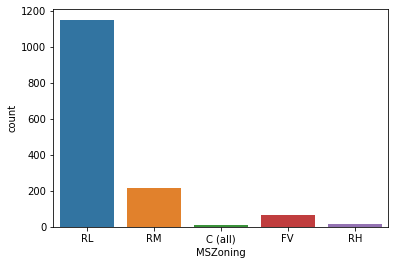

In [10]:
# Representing the column 'MSZoning' Which Refers to the zoning classification of sale to See Which Zone Has A largest number Sale 

sns.countplot(x='MSZoning',data=DF)


So The Most Sale is in the 'RL' Classification which Refers to (Residential Low Density)

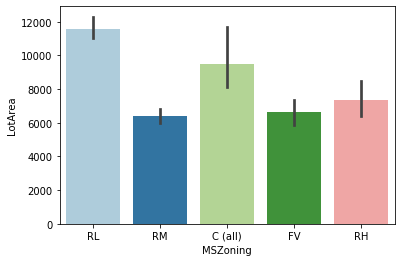

In [11]:
# Representing All Classifications with Comparing with Square Area 

sns.barplot(x='MSZoning',y='LotArea',data=DF,palette='Paired')


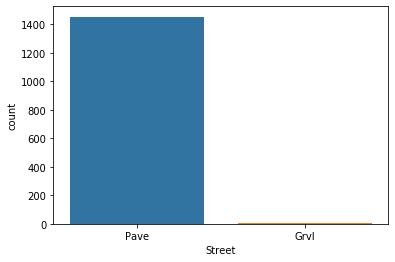

In [12]:
# Representing "Street" To the Which Kind Of road to the Property is the most type 

sns.countplot(x='Street',data=DF)

So That 'pave' which refers to Paved is the most frequent 

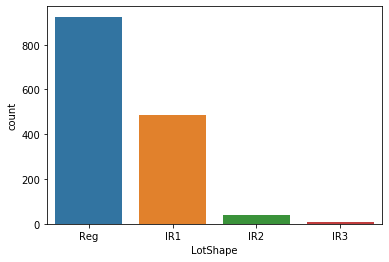

In [13]:
#Representing 'LotShape' to Show the General Shapes of each Property
sns.countplot(x='LotShape',data=DF)


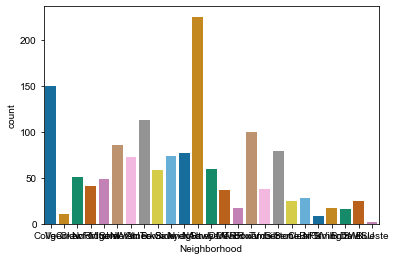

In [14]:
# Reperesenting The Frequency Of the Physical Location for Each Property 

sns.countplot(x='Neighborhood',data=DF,palette='colorblind')


sns.set(rc={'figure.figsize':(50,50)})

Sarting Data Preprocessing  as a Preparation for Data Modeling 

# now after Preparing Categorical Data , we will preparing Numerical Data by Scaling its features to optmize our ML Model 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
numeric_list = DF.select_dtypes(include = "int64" or "float64").columns
print (numeric_list)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [17]:
scaler = StandardScaler()
for n in numeric_list :
    DF[n]=scaler.fit_transform(DF[n].values.reshape(-1, 1))
    

Appling Label Encoder For Categorical Data As A Preparation for ML Model to can Understand Them 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
objList = DF.select_dtypes(include = "object").columns
print (objList)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [20]:
le = LabelEncoder()

for i in objList:
    DF[i] = le.fit_transform(DF[i].astype(str))




Ensure That All is Ready For Data Modeling 

In [21]:
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,3,65.0,-0.207142,1,3,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8,4,0.347273
1,-1.728492,-0.872563,3,80.0,-0.091886,1,3,3,0,2,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8,4,0.007288
2,-1.726120,0.073375,3,68.0,0.073480,1,0,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8,4,0.536154
3,-1.723747,0.309859,3,60.0,-0.096897,1,0,3,0,0,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,8,0,-0.515281
4,-1.721374,0.073375,3,84.0,0.375148,1,0,3,0,2,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,8,4,0.869843


So We After Enocding And Scaling Data We Will see our Data Correlation 

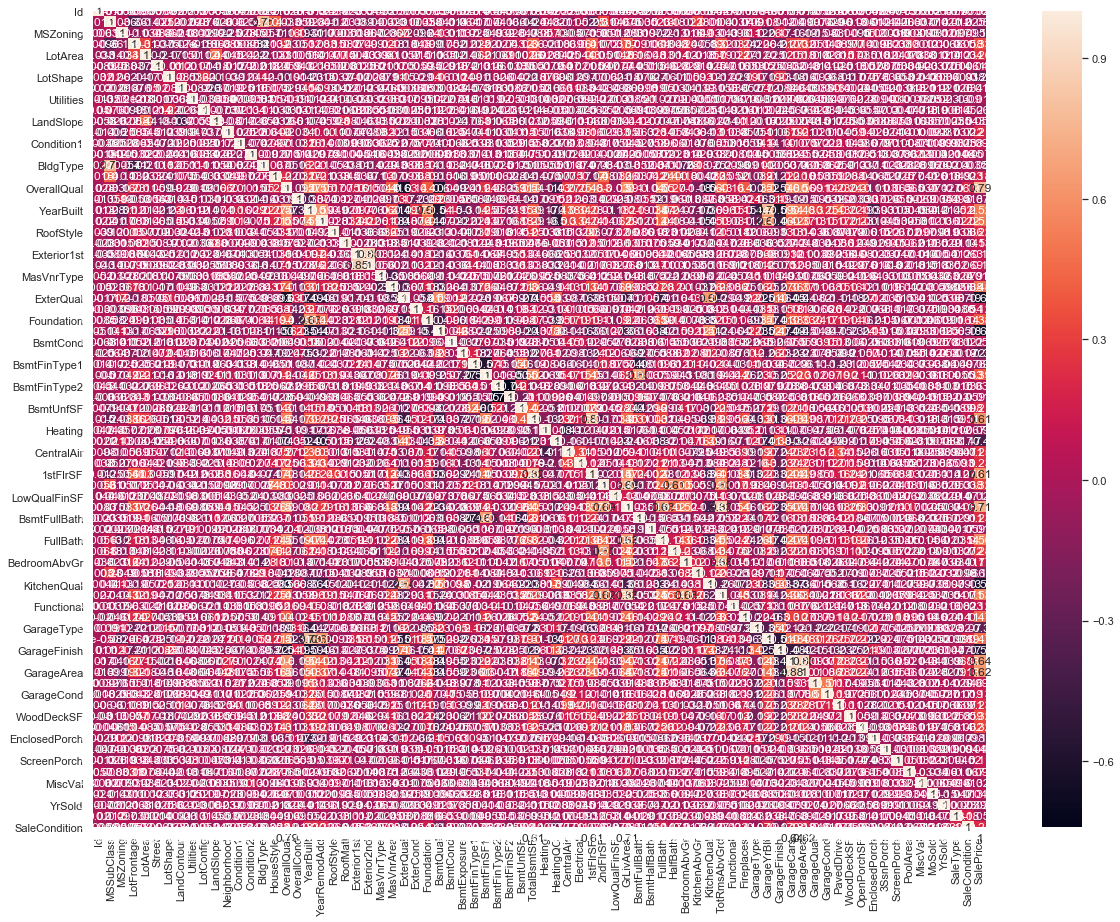

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(DF.corr(),annot=True);

Now We will working For Preparing Test Data

In [23]:
df_test = pd.read_csv('D:\\DataSets\\test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Checking for null values in testing data 

In [24]:
df_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [25]:
# Handing Missing Values as we Handel it in Training Data 

In [26]:
# dropping Columns (Alley , FireplaceQu ,PoolQC,Fence,MiscFeature)

df_test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns', inplace=True)




In [27]:
# Replace Categorical Values in Columns With Mode

# First Column 'BsmtQual' 

df_test["BsmtQual"].mode()[0]
BsmtQual_mode=df_test["BsmtQual"].mode()[0]
df_test["BsmtQual"].fillna(BsmtQual_mode,inplace=True)

#Second Column 'BsmtCond' 

df_test["BsmtCond"].mode()[0]
BsmtCond_mode=df_test["BsmtCond"].mode()[0]
df_test["BsmtCond"].fillna(BsmtCond_mode,inplace=True)

#Third Column 'BsmtExposure' 

df_test["BsmtExposure"].mode()[0]
BsmtExposure_mode=df_test["BsmtExposure"].mode()[0]
df_test["BsmtExposure"].fillna(BsmtExposure_mode,inplace=True)

# Fourth Column 'BsmtFinType1' 

df_test["BsmtFinType1"].mode()[0]
BsmtFinType1_mode=df_test["BsmtFinType1"].mode()[0]
df_test["BsmtFinType1"].fillna(BsmtFinType1_mode,inplace=True)

# Fifth Column 'BsmtFinType2'

df_test["BsmtFinType2"].mode()[0]
BsmtFinType2_mode=df_test["BsmtFinType2"].mode()[0]
df_test["BsmtFinType2"].fillna(BsmtFinType2_mode,inplace=True)

#Sixth Column 'Exterior1st'

df_test["Exterior1st"].mode()[0]
Exterior1st_mode=df_test["Exterior1st"].mode()[0]
df_test["Exterior1st"].fillna(Exterior1st_mode,inplace=True)

# Seventh Column 'GarageType'

df_test["GarageType"].mode()[0]
GarageType_mode=df_test["GarageType"].mode()[0]
df_test["GarageType"].fillna(GarageType_mode,inplace=True)

# Eigth Cloumn 'GarageFinish'

df_test["GarageFinish"].mode()[0]
GarageFinish_mode=df_test["GarageFinish"].mode()[0]
df_test["GarageFinish"].fillna(GarageFinish_mode,inplace=True)

# Ninth Column 'GarageQual'

df_test["GarageQual"].mode()[0]
GarageQual_mode=df_test["GarageQual"].mode()[0]
df_test["GarageQual"].fillna(GarageQual_mode,inplace=True)

#Tenth Column 'GarageCond'

df_test["GarageCond"].mode()[0]
GarageCond_mode=df_test["GarageCond"].mode()[0]
df_test["GarageCond"].fillna(GarageCond_mode,inplace=True)

# Eleventh Cloumn 'MasVnrType'

df_test ['MasVnrType'].mode()[0]
MasVnrType_mode=df_test['MasVnrType'].mode()[0]
df_test["MasVnrType"].fillna(MasVnrType_mode,inplace=True)

# Twelve Coloumn 'Exterior2nd'

df_test ['Exterior2nd'].mode()[0]
Exterior2nd_mode=df_test['Exterior2nd'].mode()[0]
df_test["Exterior2nd"].fillna(Exterior2nd_mode,inplace=True)

# Thirteen Column 'KitchenQual'
df_test ['KitchenQual'].mode()[0]
KitchenQual_mode=df_test['KitchenQual'].mode()[0]
df_test["KitchenQual"].fillna(KitchenQual_mode,inplace=True)

# Fourteen Column 'SaleType'
df_test ['SaleType'].mode()[0]
SaleType_mode=df_test['SaleType'].mode()[0]
df_test["SaleType"].fillna(SaleType_mode,inplace=True)


In [28]:
# Replace missing values in Collumns with numeric values by Mean (Average)

#First Cloumn 'LotFrontage'

LotFrontage_mean=df_test["LotFrontage"].mean()
df_test['LotFrontage'].fillna(LotFrontage_mean,inplace=True)

#Second Column 'GarageYrBlt'

GarageYrBlt_mean = df_test['GarageYrBlt'].mean()
df_test['GarageYrBlt'].fillna(GarageYrBlt_mean,inplace=True)


# Third Column 'MasVnrArea'

MasVnrArea_mean = df_test['MasVnrArea'].mean()
df_test['MasVnrArea'].fillna(MasVnrArea_mean,inplace=True)

# Fourth Column 'BsmtFinSF1'

BsmtFinSF1_mean = df_test['BsmtFinSF1'].mean()
df_test['BsmtFinSF1'].fillna(BsmtFinSF1_mean,inplace=True)

#fifth column 'BsmtFinSF2'
BsmtFinSF2_mean = df_test['BsmtFinSF2'].mean()
df_test['BsmtFinSF2'].fillna(BsmtFinSF2_mean,inplace=True)
# sixth Cloumn 'BsmtUnfSF'
BsmtUnfSF_mean = df_test['BsmtUnfSF'].mean()
df_test['BsmtUnfSF'].fillna(BsmtUnfSF_mean,inplace=True)

# Seventh cloumn 'TotalBsmtSF'
TotalBsmtSF_mean = df_test['TotalBsmtSF'].mean()
df_test['TotalBsmtSF'].fillna(TotalBsmtSF_mean,inplace=True)
# eighth Column 'BsmtFullBath'
BsmtFullBath_mean = df_test['BsmtFullBath'].mean()
df_test['BsmtFullBath'].fillna(BsmtFullBath_mean,inplace=True)

# ninth column 'BsmtHalfBath'

BsmtHalfBath_mean = df_test['BsmtHalfBath'].mean()
df_test['BsmtHalfBath'].fillna(BsmtHalfBath_mean,inplace=True)

# Tenth column 'GarageCars'
GarageCars_mean = df_test['GarageCars'].mean()
df_test['GarageCars'].fillna(GarageCars_mean,inplace=True)

#eleventh column 'GarageArea'

GarageArea_mean = df_test['GarageArea'].mean()
df_test['GarageArea'].fillna(GarageArea_mean,inplace=True)

# now we are going to Preprocessing data 

In [29]:
# scaling Numeric Data 

numeric_list_test = df_test.select_dtypes(include = "int64" or "float64").columns
print (numeric_list_test)


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [30]:
for a in numeric_list_test :
    df_test[a]=scaler.fit_transform(df_test[a].values.reshape(-1, 1))
    

In [31]:
# Applying label Encoder to categorical Data 

objList_test = df_test.select_dtypes(include = "object").columns
print (objList_test)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [32]:
for s in objList_test:
    df_test[s] = le.fit_transform(df_test[s].astype(str))


In [33]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730864,-0.874711,2,80.0,0.363929,1,3,3,0,4,...,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,8,4
1,-1.728490,-0.874711,3,81.0,0.897861,1,0,3,0,0,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,8,4
2,-1.726115,0.061351,3,74.0,0.809646,1,0,3,0,4,...,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,8,4
3,-1.723741,0.061351,3,78.0,0.032064,1,0,3,0,4,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,8,4
4,-1.721367,1.465443,3,43.0,-0.971808,1,0,1,0,4,...,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,8,4


# now both Data for Training & Testing Are Ready For Modeling 

# Its Time to Split Our Data 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train=DF.drop('SalePrice',axis=1).values
Y_train=DF['SalePrice'].values

In [39]:
X_test = np.array(df_test)

In [40]:
# Modeling 


from sklearn.linear_model import LinearRegression

lr=LinearRegression().fit(X_train,Y_train)

Y_test = lr.predict(X_test)

# Evaluating our Regression Model 

In [41]:
from sklearn.metrics import  r2_score

In [44]:
print('DecisionTreeRegressor Train Score is : ' , lr.score(X_train, Y_train))
print('DecisionTreeRegressor test Score is : ' , lr.score(X_test, Y_test))


DecisionTreeRegressor Train Score is :  0.8495285560863987
DecisionTreeRegressor test Score is :  1.0


# Printing The Predicted Data 

In [45]:
print('the prediction of test data : ' ,Y_test)

the prediction of test data :  [28.74060579 54.53031207 42.04731304 ... 63.16458315 26.41627253
 41.00392545]


In [46]:
# Exporting The Submission File 

In [47]:
df_submission = (df_test['Id'] + Y_test)

In [48]:
df_submission

0        27.009742
1        52.801822
2        40.321198
3        32.628602
4        23.081099
5         5.270396
6        50.409886
7         5.901374
8        39.175293
9        41.111965
10       57.919752
11        8.540347
12       14.486882
13       27.767768
14        6.623432
15       16.311607
16       13.237679
17       22.034052
18       20.727256
19       90.547834
20       40.695793
21       14.890535
22       13.345517
23       11.242224
24       14.309097
25        6.999667
26       14.392234
27       13.802434
28        9.750005
29       74.513531
30        6.442045
31        5.166361
32       40.075993
33       47.309438
34       60.142484
35       70.179865
36        5.063879
37       14.376136
38       19.079013
39       18.223183
40       25.070877
41       11.464587
42       58.539392
43       28.101655
44       49.644453
45       40.887662
46       59.261077
47       40.209604
48       18.201287
49       40.181205
50       55.150038
51       57.511858
52        1.